# Option Greeks Explained

## 1. Delta (Δ)
**Definition:** Measures the rate of change of an option's price with respect to changes in the underlying asset price.

### For a Put Option (`flag='p'`):
- Delta is **negative** because put options gain value when the stock price decreases.
- It ranges from **-1** (deep ITM) to **0** (deep OTM).
- As the stock price **decreases**, Delta moves **closer to -1** (ITM put), indicating the put option is more sensitive to price changes.
- As the stock price **increases**, Delta moves **toward 0** (OTM put), showing little sensitivity.

### **For a Call Option (`flag='c'`):**  
- **Delta is positive** because call options gain value when the stock price **increases**.  
- It ranges from **0 (deep OTM) to +1 (deep ITM)**.  
- As the stock price **increases**, Delta moves **closer to +1** (ITM call), indicating the call option is more sensitive to price changes.  
- As the stock price **decreases**, Delta moves **toward 0** (OTM call), showing little sensitivity.  

### **Interactions:**
- **Gamma** affects the rate at which Delta changes.
- **Time decay (Theta)** can cause Delta to shift as expiry approaches.

---

## 2. Gamma (Γ)
**Definition:** Measures the rate of change of Delta with respect to the underlying asset price.

- Gamma is **highest ATM (At-The-Money)** and decreases for deep ITM or OTM options.
- It tells us how **stable Delta** is—high Gamma means Delta changes rapidly with price movements.
- **Gamma is always positive** for both calls and puts.

### **Interactions:**
- A **high Gamma** means Delta is unstable; thus, the option price is very sensitive to the stock price.
- **Time decay (Theta)** affects Gamma, with Gamma increasing as expiry nears.
- **Vega** influences Gamma because higher IV results in a flatter Gamma curve.

---

## 3. Theta (Θ)
**Definition:** Measures the rate of time decay of an option's price.

- Theta is **negative** for both calls and puts, as options lose value over time.
- Near expiration, **ATM options have the highest Theta**, meaning they lose value the fastest.
- Deep ITM or OTM options have **lower Theta** since they are either almost fully valued (ITM) or nearly worthless (OTM).

### **Importance:**
- Traders **selling options** (like covered calls) benefit from Theta decay.
- **Theta interacts with Gamma**, as options with high Gamma tend to have high Theta.

---

## 4. Vega (ν)
**Definition:** Measures an option’s sensitivity to changes in **implied volatility (IV).**

- Vega is **highest for ATM options** and declines for deep ITM/OTM options.
- **Higher IV increases option prices**, benefiting long option holders.
- A **decrease in IV reduces option prices**, benefiting option sellers.

### **Interactions:**
- **Vega and Theta:** As expiration nears, Vega decreases, meaning options are less sensitive to IV changes.
- **Vega and Gamma:** High Vega means the option price is more stable since large changes in IV smooth out Delta movements.

---

## 5. Rho (ρ)
**Definition:** Measures an option’s sensitivity to changes in **interest rates.**

- **For put options, Rho is negative**: As interest rates increase, put option values decline.
- **For call options, Rho is positive**: Higher rates make calls more valuable.
- **Rho is most significant for long-term options** but has little impact on short-term trades.

### **Interactions:**
- **Rho and Vega:** Higher interest rates can sometimes correlate with changes in volatility.
- **Rho and Delta:** Changing interest rates slightly shift the Delta curve.


# When Strike Price Remain Same

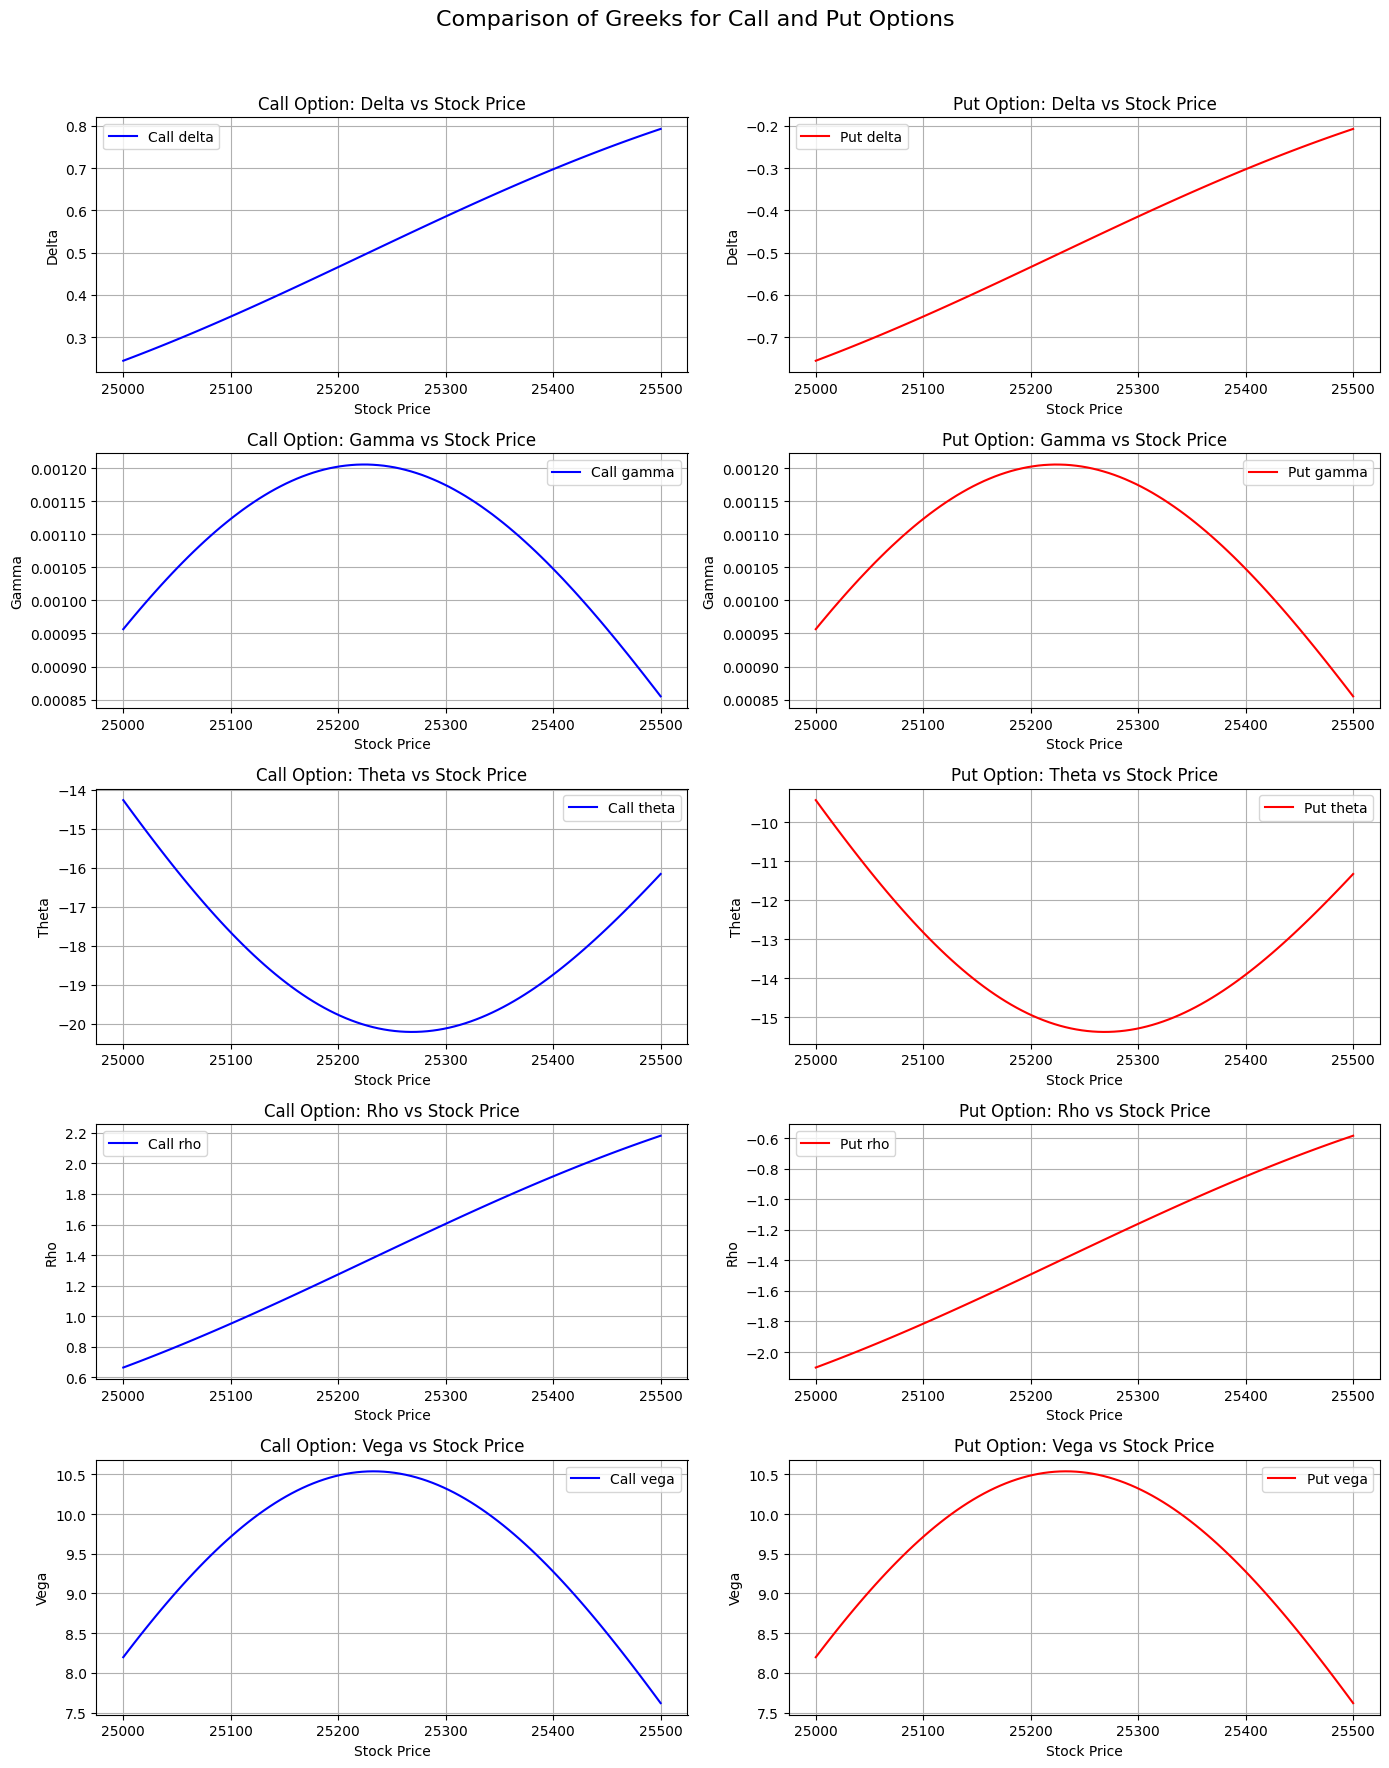

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_greeks_comparison(S_range, K, T, R, IV):
    greek_values = {'delta': [], 'gamma': [], 'theta': [], 'rho': [], 'vega': []}
    greek_values_put = {'delta': [], 'gamma': [], 'theta': [], 'rho': [], 'vega': []}

    for S in S_range:
        # Greeks for Call Option
        greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
        for greek in greek_values:
            greek_values[greek].append(greeks_call[greek][0])

        # Greeks for Put Option
        greeks_put = get_all_greeks('p', S, K, T, R, IV, model='black_scholes', return_as='dict')
        for greek in greek_values_put:
            greek_values_put[greek].append(greeks_put[greek][0])

    fig, axs = plt.subplots(5, 2, figsize=(14, 18))
    fig.suptitle('Comparison of Greeks for Call and Put Options', fontsize=16)

    for i, greek in enumerate(greek_values.keys()):
        # Call Option Greeks
        axs[i, 0].plot(S_range, greek_values[greek], label=f'Call {greek}', color='b')
        axs[i, 0].set_title(f'Call Option: {greek.capitalize()} vs Stock Price')
        axs[i, 0].set_xlabel('Stock Price')
        axs[i, 0].set_ylabel(greek.capitalize())
        axs[i, 0].legend()
        axs[i, 0].grid()

        # Put Option Greeks
        axs[i, 1].plot(S_range, greek_values_put[greek], label=f'Put {greek}', color='r')
        axs[i, 1].set_title(f'Put Option: {greek.capitalize()} vs Stock Price')
        axs[i, 1].set_xlabel('Stock Price')
        axs[i, 1].set_ylabel(greek.capitalize())
        axs[i, 1].legend()
        axs[i, 1].grid()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Define parameters
S_range = np.linspace(25000, 25500, 100)  # Stock price range
K = 25250  # Strike price
T = 4/365  # Time to expiry (in years)
R = 7/100  # Risk-free rate
IV = 12.53/100  # Implied volatility

# Plot Greeks for both Call and Put Options
plot_greeks_comparison(S_range, K, T, R, IV)

# When Spot Price Remain Same

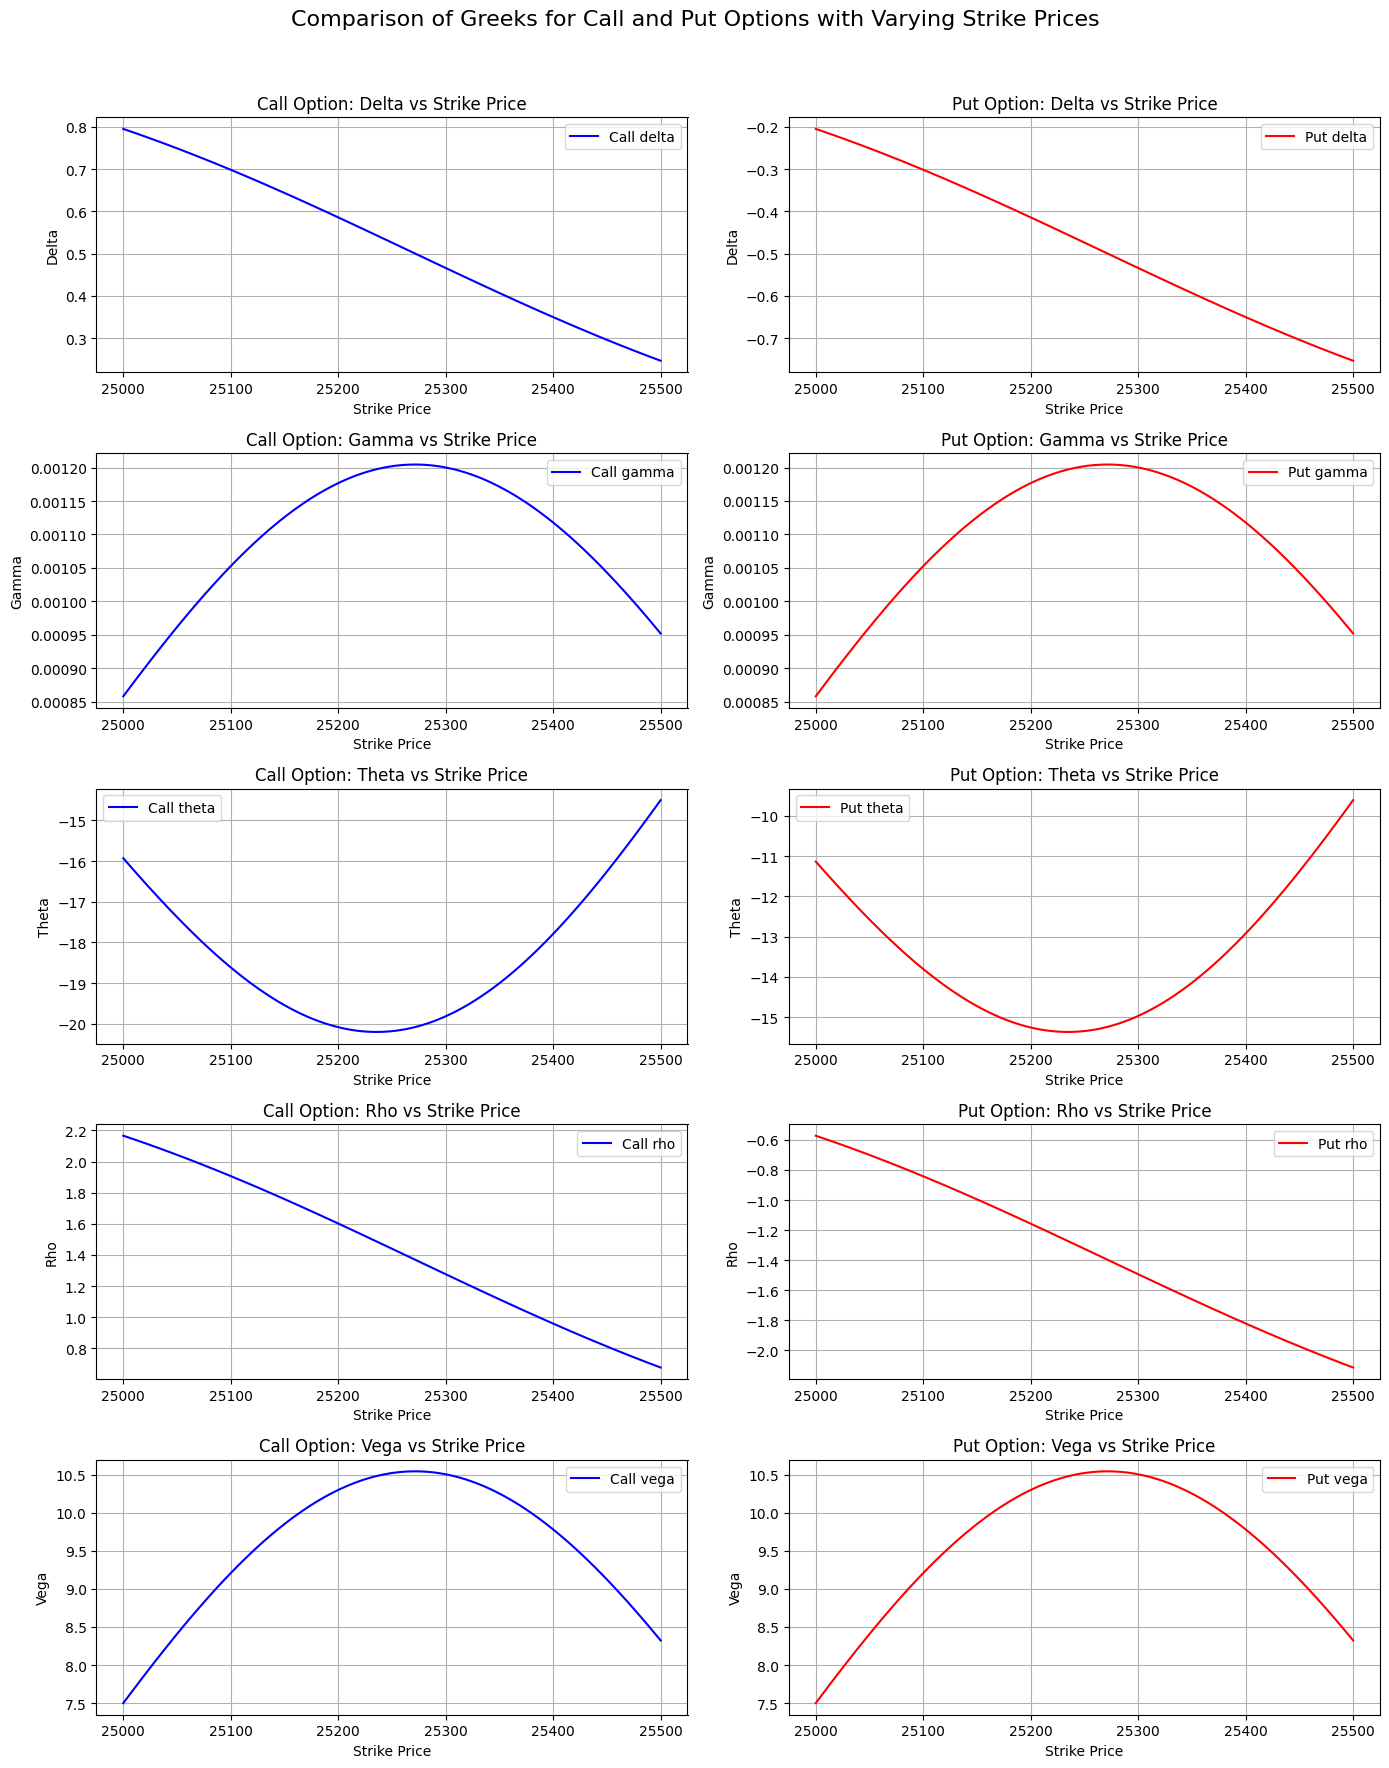

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_greeks_strike_comparison(S, K_range, T, R, IV):
    greek_values = {'delta': [], 'gamma': [], 'theta': [], 'rho': [], 'vega': []}
    greek_values_put = {'delta': [], 'gamma': [], 'theta': [], 'rho': [], 'vega': []}

    for K in K_range:
        # Greeks for Call Option
        greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
        for greek in greek_values:
            greek_values[greek].append(greeks_call[greek][0])

        # Greeks for Put Option
        greeks_put = get_all_greeks('p', S, K, T, R, IV, model='black_scholes', return_as='dict')
        for greek in greek_values_put:
            greek_values_put[greek].append(greeks_put[greek][0])

    fig, axs = plt.subplots(5, 2, figsize=(14, 18))
    fig.suptitle('Comparison of Greeks for Call and Put Options with Varying Strike Prices', fontsize=16)

    for i, greek in enumerate(greek_values.keys()):
        # Call Option Greeks
        axs[i, 0].plot(K_range, greek_values[greek], label=f'Call {greek}', color='b')
        axs[i, 0].set_title(f'Call Option: {greek.capitalize()} vs Strike Price')
        axs[i, 0].set_xlabel('Strike Price')
        axs[i, 0].set_ylabel(greek.capitalize())
        axs[i, 0].legend()
        axs[i, 0].grid()

        # Put Option Greeks
        axs[i, 1].plot(K_range, greek_values_put[greek], label=f'Put {greek}', color='r')
        axs[i, 1].set_title(f'Put Option: {greek.capitalize()} vs Strike Price')
        axs[i, 1].set_xlabel('Strike Price')
        axs[i, 1].set_ylabel(greek.capitalize())
        axs[i, 1].legend()
        axs[i, 1].grid()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Define parameters
S = 25250  # Fixed Spot price
K_range = np.linspace(25000, 25500, 100)  # Varying Strike price
T = 4/365  # Time to expiry (in years)
R = 7/100  # Risk-free rate
IV = 12.53/100  # Implied volatility

# Plot Greeks for both Call and Put Options with varying Strike Prices
plot_greeks_strike_comparison(S, K_range, T, R, IV)

# Greeks Interaction

## 1. Delta (Δ) and Gamma (Γ) Interaction  

### **How They Relate:**  
- **Gamma measures the rate of change of Delta.**  
- If **Gamma is high**, Delta is **unstable** and changes significantly with small price moves.  
- If **Gamma is low**, Delta changes **gradually** and remains more stable.  

### **Example:**  
- **ATM options have the highest Gamma.**  
  - This means Delta changes **rapidly** when the stock moves.  
- **ITM and OTM options have low Gamma.**  
  - Delta is more stable, meaning **small price changes** don’t affect the option’s sensitivity much.  

### **Implication:**  
- Traders with large **Delta positions** (like market makers) hedge using **Gamma** to manage risk.  
- **High Gamma exposure** requires frequent **rebalancing** to maintain a neutral Delta position.  


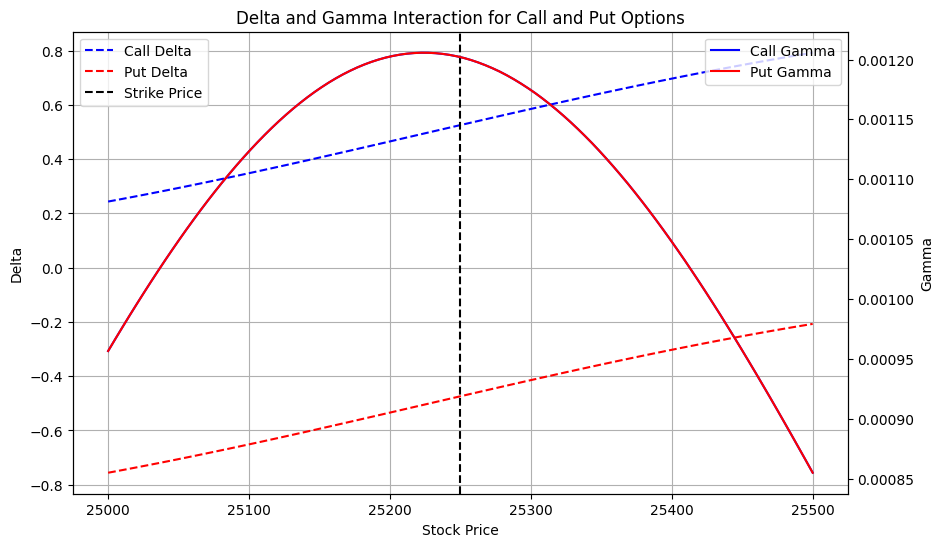

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_delta_gamma_interaction(S_range, K, T, R, IV):
    delta_call, gamma_call = [], []
    delta_put, gamma_put = [], []

    for S in S_range:
        # Call Option Greeks
        greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
        delta_call.append(greeks_call['delta'][0])
        gamma_call.append(greeks_call['gamma'][0])

        # Put Option Greeks
        greeks_put = get_all_greeks('p', S, K, T, R, IV, model='black_scholes', return_as='dict')
        delta_put.append(greeks_put['delta'][0])
        gamma_put.append(greeks_put['gamma'][0])

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Plot Delta
    ax1.plot(S_range, delta_call, label='Call Delta', color='blue', linestyle='dashed')
    ax1.plot(S_range, delta_put, label='Put Delta', color='red', linestyle='dashed')

    # Plot Gamma
    ax2.plot(S_range, gamma_call, label='Call Gamma', color='blue', linestyle='solid')
    ax2.plot(S_range, gamma_put, label='Put Gamma', color='red', linestyle='solid')

    # Add vertical line at strike price
    ax1.axvline(x=K, color='black', linestyle='--', label='Strike Price')
    ax1.legend()


    ax1.set_xlabel('Stock Price')
    ax1.set_ylabel('Delta', color='black')
    ax2.set_ylabel('Gamma', color='black')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.set_title('Delta and Gamma Interaction for Call and Put Options')
    ax1.grid()

    plt.show()

# Define parameters
S_range = np.linspace(25000, 25500, 100)  # Stock price range
K = 25250  # Strike price
T = 4/365  # Time to expiry (in years)
R = 7/100  # Risk-free rate
IV = 12.53/100  # Implied volatility

# Plot Delta and Gamma Interaction
plot_delta_gamma_interaction(S_range, K, T, R, IV)


## 2. Delta (Δ) and Vega (ν) Interaction  

### **How They Relate:**  
- **Vega measures sensitivity to implied volatility (IV).**  
- When **IV increases**, options become **more expensive**, impacting Delta.  

### **Example:**  
- A **long call option (positive Delta) with high Vega** benefits from increased IV.  
- If **IV drops**, the option **loses value**, and Delta might shift toward **OTM values**.  

### **Implication:**  
- **Near expiration**, Vega **decreases**, and Delta becomes **more sensitive** to price changes.  
- If a trader expects **higher volatility**, they might take positions with **both high Delta and Vega**.  


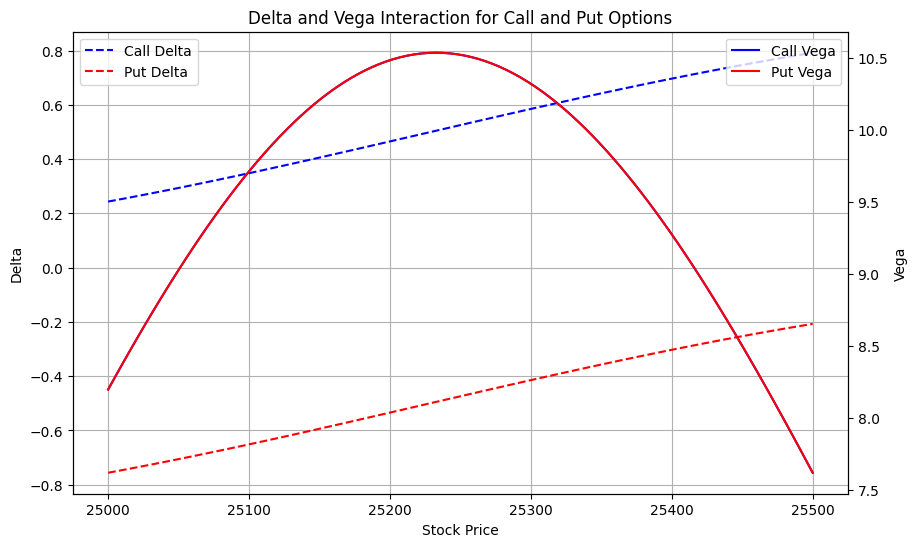

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_delta_vega_interaction(S_range, K, T, R, IV):
    delta_call, vega_call = [], []
    delta_put, vega_put = [], []

    for S in S_range:
        # Call Option Greeks
        greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
        delta_call.append(greeks_call['delta'][0])
        vega_call.append(greeks_call['vega'][0])

        # Put Option Greeks
        greeks_put = get_all_greeks('p', S, K, T, R, IV, model='black_scholes', return_as='dict')
        delta_put.append(greeks_put['delta'][0])
        vega_put.append(greeks_put['vega'][0])

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Plot Delta
    ax1.plot(S_range, delta_call, label='Call Delta', color='blue', linestyle='dashed')
    ax1.plot(S_range, delta_put, label='Put Delta', color='red', linestyle='dashed')

    # Plot Vega
    ax2.plot(S_range, vega_call, label='Call Vega', color='blue', linestyle='solid')
    ax2.plot(S_range, vega_put, label='Put Vega', color='red', linestyle='solid')

    ax1.set_xlabel('Stock Price')
    ax1.set_ylabel('Delta', color='black')
    ax2.set_ylabel('Vega', color='black')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.set_title('Delta and Vega Interaction for Call and Put Options')
    ax1.grid()

    plt.show()

# Define parameters
S_range = np.linspace(25000, 25500, 100)  # Stock price range
K = 25250  # Strike price
T = 4/365  # Time to expiry (in years)
R = 7/100  # Risk-free rate
IV = 12.53/100  # Implied volatility

# Plot Delta and Vega Interaction
plot_delta_vega_interaction(S_range, K, T, R, IV)

## 3. Gamma (Γ) and Theta (Θ) Interaction  

### **How They Relate:**  
- **Gamma and Theta are inversely related.**  
- **High Gamma → High Theta decay** (especially for ATM options).  
- **Low Gamma → Low Theta decay** (deep ITM or OTM options).  

### **Example:**  
- **ATM options have the highest Gamma** → Their **Theta decay is fastest**.  
- **Deep ITM/OTM options have low Gamma** → Their **Theta decay is slower**.  

### **Implication:**  
- If a trader **sells options**, they face **Theta decay risk** but benefit if the option expires worthless.  
- **Gamma scalping strategies** involve managing **Theta losses** while adjusting **Delta**.  


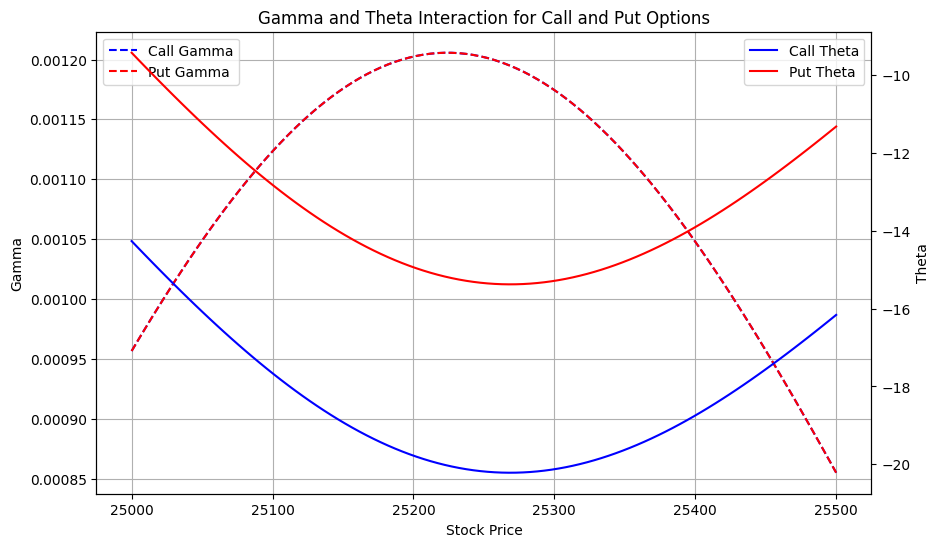

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_gamma_theta_interaction(S_range, K, T, R, IV):
    gamma_call, theta_call = [], []
    gamma_put, theta_put = [], []

    for S in S_range:
        # Call Option Greeks
        greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
        gamma_call.append(greeks_call['gamma'][0])
        theta_call.append(greeks_call['theta'][0])

        # Put Option Greeks
        greeks_put = get_all_greeks('p', S, K, T, R, IV, model='black_scholes', return_as='dict')
        gamma_put.append(greeks_put['gamma'][0])
        theta_put.append(greeks_put['theta'][0])

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Plot Gamma
    ax1.plot(S_range, gamma_call, label='Call Gamma', color='blue', linestyle='dashed')
    ax1.plot(S_range, gamma_put, label='Put Gamma', color='red', linestyle='dashed')

    # Plot Theta
    ax2.plot(S_range, theta_call, label='Call Theta', color='blue', linestyle='solid')
    ax2.plot(S_range, theta_put, label='Put Theta', color='red', linestyle='solid')

    ax1.set_xlabel('Stock Price')
    ax1.set_ylabel('Gamma', color='black')
    ax2.set_ylabel('Theta', color='black')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.set_title('Gamma and Theta Interaction for Call and Put Options')
    ax1.grid()

    plt.show()

# Define parameters
S_range = np.linspace(25000, 25500, 100)  # Stock price range
K = 25250  # Strike price
T = 4/365  # Time to expiry (in years)
R = 7/100  # Risk-free rate
IV = 12.53/100  # Implied volatility

# Plot Gamma and Theta Interaction
plot_gamma_theta_interaction(S_range, K, T, R, IV)


## 4. Vega (ν) and Theta (Θ) Interaction  

### **How They Relate:**  
- **Higher Vega** means the option is **more sensitive** to implied volatility (IV) changes.  
- **Theta measures time decay**, and options with **high Vega** typically **lose value slower** than low Vega options.  

### **Example:**  
- **Long-term options have higher Vega**, so their **Theta decay is lower**.  
- **Near-expiry options have low Vega**, so **Theta decay is more pronounced**.  

### **Implication:**  
- A trader **long options (positive Vega)** may **not worry about Theta decay** initially.  
- However, as **expiration nears**, **Theta decay accelerates**, reducing the option’s value.  


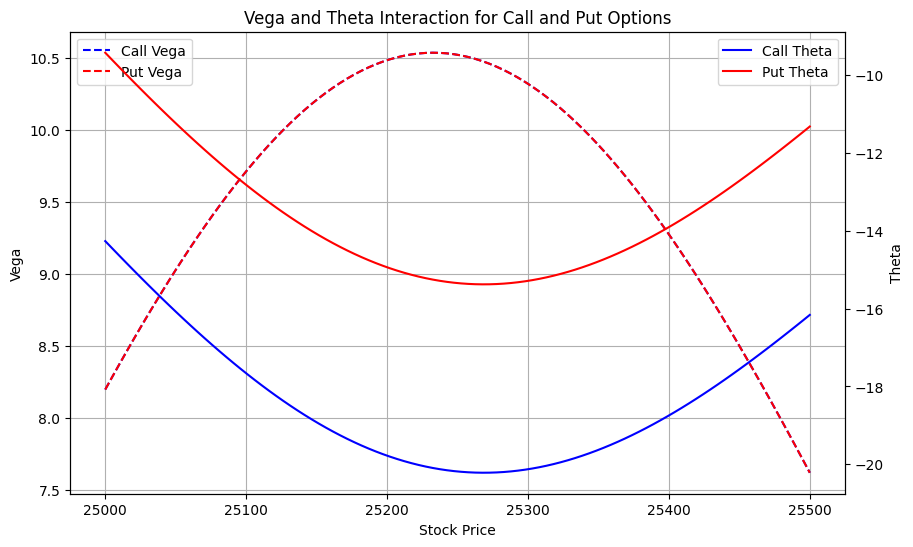

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_vega_theta_interaction(S_range, K, T, R, IV):
    vega_call, theta_call = [], []
    vega_put, theta_put = [], []

    for S in S_range:
        # Call Option Greeks
        greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
        vega_call.append(greeks_call['vega'][0])
        theta_call.append(greeks_call['theta'][0])

        # Put Option Greeks
        greeks_put = get_all_greeks('p', S, K, T, R, IV, model='black_scholes', return_as='dict')
        vega_put.append(greeks_put['vega'][0])
        theta_put.append(greeks_put['theta'][0])

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Plot Vega
    ax1.plot(S_range, vega_call, label='Call Vega', color='blue', linestyle='dashed')
    ax1.plot(S_range, vega_put, label='Put Vega', color='red', linestyle='dashed')

    # Plot Theta
    ax2.plot(S_range, theta_call, label='Call Theta', color='blue', linestyle='solid')
    ax2.plot(S_range, theta_put, label='Put Theta', color='red', linestyle='solid')

    ax1.set_xlabel('Stock Price')
    ax1.set_ylabel('Vega', color='black')
    ax2.set_ylabel('Theta', color='black')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.set_title('Vega and Theta Interaction for Call and Put Options')
    ax1.grid()

    plt.show()

# Define parameters
S_range = np.linspace(25000, 25500, 100)  # Stock price range
K = 25250  # Strike price
T = 4/365  # Time to expiry (in years)
R = 7/100  # Risk-free rate
IV = 12.53/100  # Implied volatility

# Plot Vega and Theta Interaction
plot_vega_theta_interaction(S_range, K, T, R, IV)


## 5. Rho (ρ) and Vega (ν) Interaction  

### **How They Relate:**  
- **Rho measures interest rate sensitivity**, while **Vega measures implied volatility (IV) sensitivity**.  
- When **interest rates rise**, option prices adjust, but the impact depends on Vega.  

### **Example:**  
- **Higher interest rates** may **increase IV** if uncertainty in the market rises.  
- **Lower interest rates** may **decrease IV**, making options **cheaper**.  

### **Implication:**  
- For **long-dated options, Rho matters more**.  
- For **short-term traders, Vega is a more dominant factor** in option pricing.  


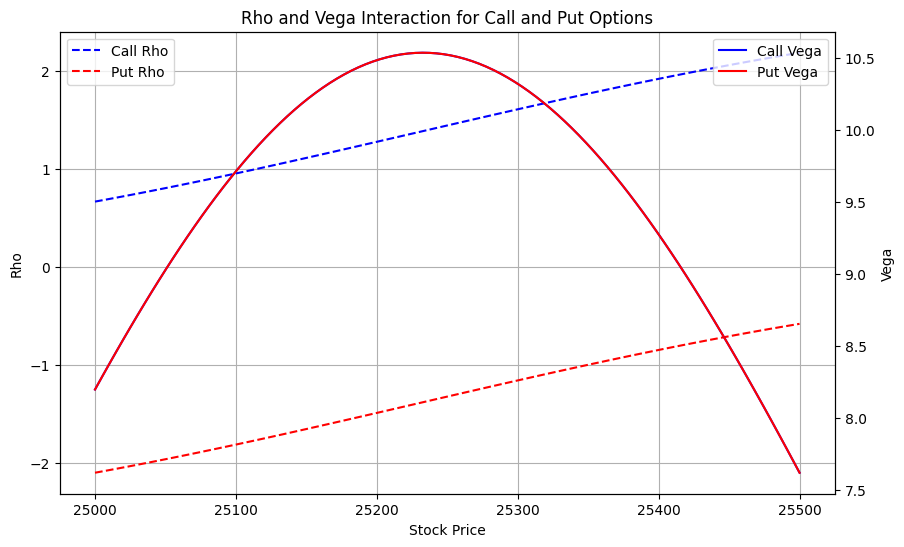

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_rho_vega_interaction(S_range, K, T, R, IV):
    rho_call, vega_call = [], []
    rho_put, vega_put = [], []

    for S in S_range:
        # Call Option Greeks
        greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
        rho_call.append(greeks_call['rho'][0])
        vega_call.append(greeks_call['vega'][0])

        # Put Option Greeks
        greeks_put = get_all_greeks('p', S, K, T, R, IV, model='black_scholes', return_as='dict')
        rho_put.append(greeks_put['rho'][0])
        vega_put.append(greeks_put['vega'][0])

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Plot Rho
    ax1.plot(S_range, rho_call, label='Call Rho', color='blue', linestyle='dashed')
    ax1.plot(S_range, rho_put, label='Put Rho', color='red', linestyle='dashed')

    # Plot Vega
    ax2.plot(S_range, vega_call, label='Call Vega', color='blue', linestyle='solid')
    ax2.plot(S_range, vega_put, label='Put Vega', color='red', linestyle='solid')

    ax1.set_xlabel('Stock Price')
    ax1.set_ylabel('Rho', color='black')
    ax2.set_ylabel('Vega', color='black')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.set_title('Rho and Vega Interaction for Call and Put Options')
    ax1.grid()

    plt.show()

# Define parameters
S_range = np.linspace(25000, 25500, 100)  # Stock price range
K = 25250  # Strike price
T = 4/365  # Time to expiry (in years)
R = 7/100  # Risk-free rate
IV = 12.53/100  # Implied volatility

# Plot Rho and Vega Interaction
plot_rho_vega_interaction(S_range, K, T, R, IV)


## Sensitivity of Greeks to Time Decay (T)  

### **Concept:**  
As **time to expiry (T) decreases**:  
- **Theta (Θ) increases**, making option prices **decay faster**.  
- **Gamma (Γ) increases** for **ATM options**, leading to **more sensitivity** to price changes.  
- **Vega (ν) declines**, meaning options become **less sensitive** to volatility changes.  
- **Delta (Δ) stabilizes** for **ITM/OTM options** but **fluctuates** for **ATM options**.  


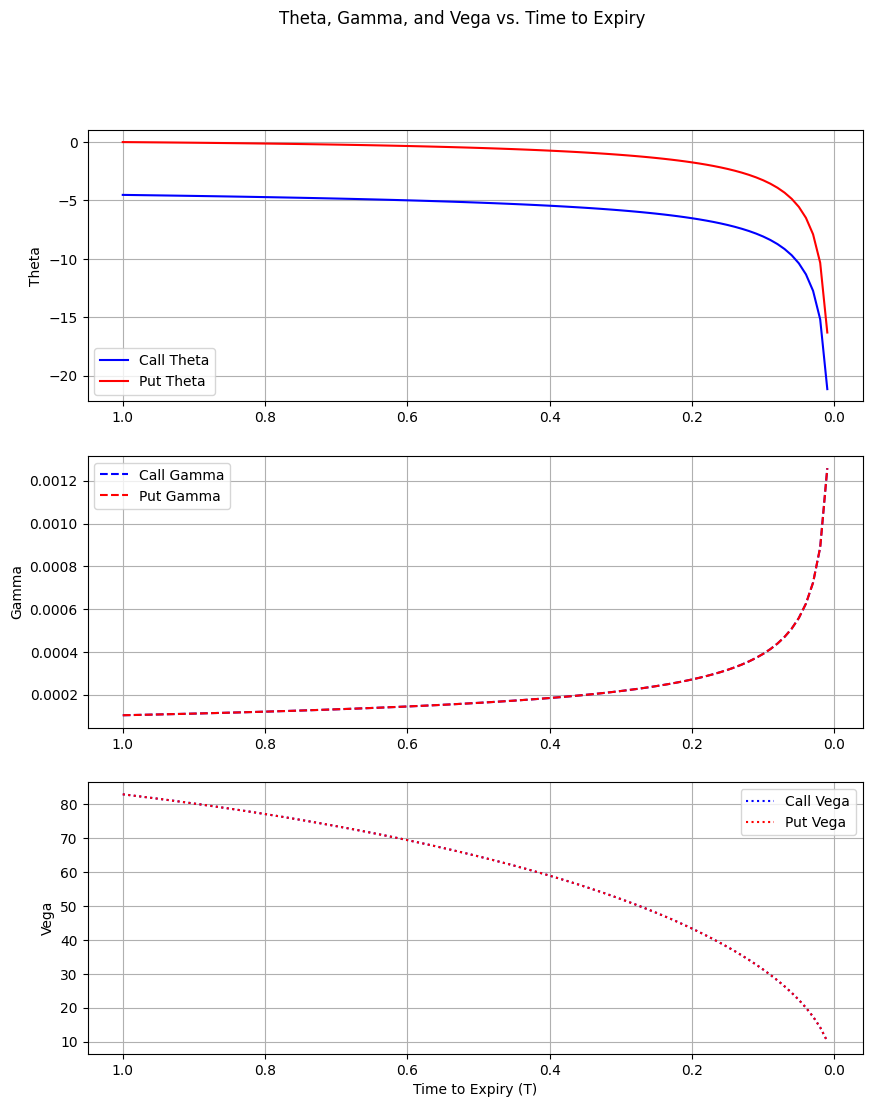

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_greeks_vs_time(S, K, T_range, R, IV):
    theta_call, gamma_call, vega_call = [], [], []
    theta_put, gamma_put, vega_put = [], [], []

    for T in T_range:
        # Call Option Greeks
        greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
        theta_call.append(greeks_call['theta'][0])
        gamma_call.append(greeks_call['gamma'][0])
        vega_call.append(greeks_call['vega'][0])

        # Put Option Greeks
        greeks_put = get_all_greeks('p', S, K, T, R, IV, model='black_scholes', return_as='dict')
        theta_put.append(greeks_put['theta'][0])
        gamma_put.append(greeks_put['gamma'][0])
        vega_put.append(greeks_put['vega'][0])

    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    # Reverse x-axis for correct ordering
    for ax in axs:
        ax.invert_xaxis()

    # Plot Theta
    axs[0].plot(T_range, theta_call, label='Call Theta', color='blue', linestyle='solid')
    axs[0].plot(T_range, theta_put, label='Put Theta', color='red', linestyle='solid')
    axs[0].set_ylabel('Theta')
    axs[0].legend()
    axs[0].grid()

    # Plot Gamma
    axs[1].plot(T_range, gamma_call, label='Call Gamma', color='blue', linestyle='dashed')
    axs[1].plot(T_range, gamma_put, label='Put Gamma', color='red', linestyle='dashed')
    axs[1].set_ylabel('Gamma')
    axs[1].legend()
    axs[1].grid()

    # Plot Vega
    axs[2].plot(T_range, vega_call, label='Call Vega', color='blue', linestyle='dotted')
    axs[2].plot(T_range, vega_put, label='Put Vega', color='red', linestyle='dotted')
    axs[2].set_xlabel('Time to Expiry (T)')
    axs[2].set_ylabel('Vega')
    axs[2].legend()
    axs[2].grid()

    plt.suptitle('Theta, Gamma, and Vega vs. Time to Expiry')
    plt.show()

# Define parameters
S = 25250  # Stock price
K = 25250  # Strike price
T_range = np.linspace(1, 0.01, 100)  # Time to expiry in descending order
R = 7/100  # Risk-free rate
IV = 12.53/100  # Implied volatility

# Plot Greeks vs Time to Expiry
plot_greeks_vs_time(S, K, T_range, R, IV)

## Impact of Implied Volatility (IV) on Greeks  

### **Concept:**  
Implied Volatility (IV) directly affects **Vega, Delta, Gamma, Theta, and Rho**:  
- **Higher IV increases Vega**, making options **more sensitive** to volatility changes.  
- **Gamma decreases** with **high IV**, making options **less reactive** to price changes.  
- **Theta increases** (**more time decay**) for **higher IV**, especially for **ATM options**.  


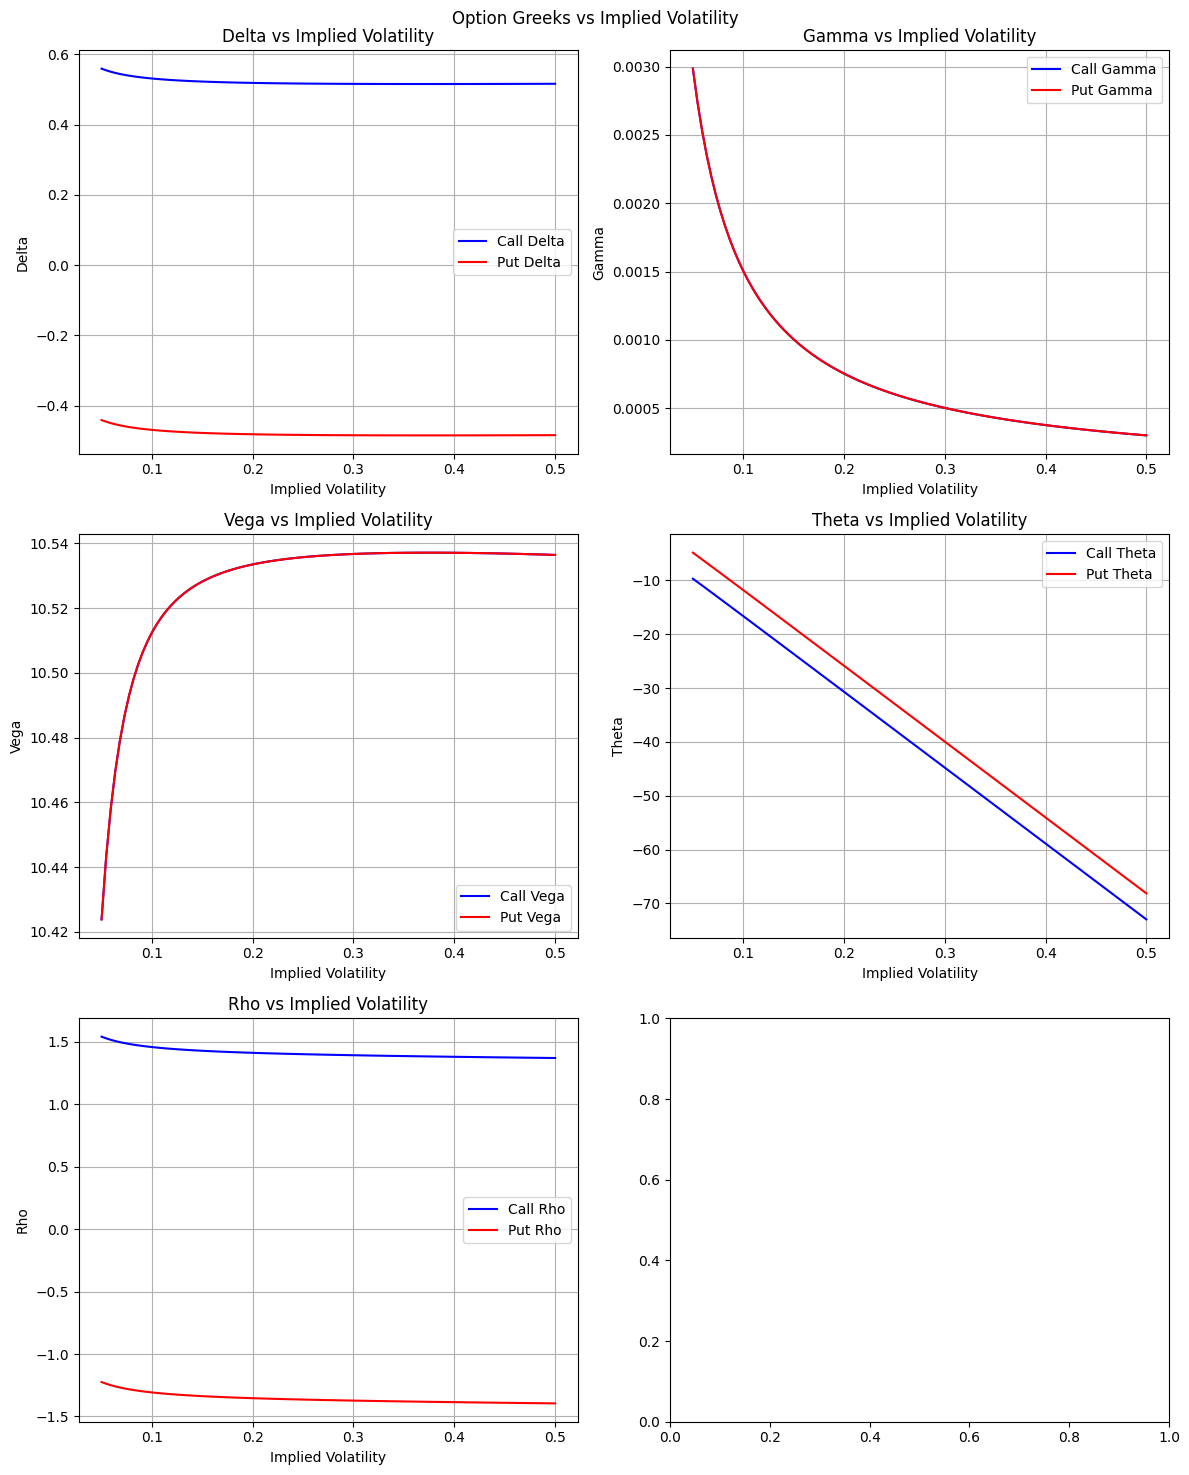

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_greeks_vs_iv(S, K, T, R, IV_range):
    delta_call, gamma_call, vega_call, theta_call, rho_call = [], [], [], [], []
    delta_put, gamma_put, vega_put, theta_put, rho_put = [], [], [], [], []

    for IV in IV_range:
        # Call Option Greeks
        greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
        delta_call.append(greeks_call['delta'][0])
        gamma_call.append(greeks_call['gamma'][0])
        vega_call.append(greeks_call['vega'][0])
        theta_call.append(greeks_call['theta'][0])
        rho_call.append(greeks_call['rho'][0])

        # Put Option Greeks
        greeks_put = get_all_greeks('p', S, K, T, R, IV, model='black_scholes', return_as='dict')
        delta_put.append(greeks_put['delta'][0])
        gamma_put.append(greeks_put['gamma'][0])
        vega_put.append(greeks_put['vega'][0])
        theta_put.append(greeks_put['theta'][0])
        rho_put.append(greeks_put['rho'][0])

    fig, axs = plt.subplots(3, 2, figsize=(12, 15))
    axs = axs.flatten()

    greek_names = ['Delta', 'Gamma', 'Vega', 'Theta', 'Rho']
    call_greeks = [delta_call, gamma_call, vega_call, theta_call, rho_call]
    put_greeks = [delta_put, gamma_put, vega_put, theta_put, rho_put]

    for i, greek in enumerate(greek_names):
        axs[i].plot(IV_range, call_greeks[i], label=f'Call {greek}', color='blue')
        axs[i].plot(IV_range, put_greeks[i], label=f'Put {greek}', color='red')
        axs[i].set_title(f'{greek} vs Implied Volatility')
        axs[i].set_xlabel('Implied Volatility')
        axs[i].set_ylabel(greek)
        axs[i].legend()
        axs[i].grid()

    plt.suptitle('Option Greeks vs Implied Volatility')
    plt.tight_layout()
    plt.show()

# Define parameters
S = 25250  # Stock price
K = 25250  # Strike price
T = 4/365  # Time to expiry
R = 7/100  # Risk-free rate
IV_range = np.linspace(5/100, 50/100, 100)  # Implied volatility range from 5% to 50%

# Plot Greeks vs Implied Volatility
plot_greeks_vs_iv(S, K, T, R, IV_range)


## Impact of Strike Price (K) on Greeks  

### **Concept:**  
As **Strike Price (K) changes** while keeping the **Spot Price (S) constant**, we observe:  

- **Delta shifts**:  
  - **Calls lose value** (move towards **0**).  
  - **Puts gain value** (move towards **-1**).  
- **Gamma peaks at ATM**:  
  - **Highest for ATM options**, lower for ITM/OTM.  
- **Vega is highest at ATM**:  
  - Sensitivity to volatility is **strongest near ATM**.  
- **Theta and Rho behave differently** for **calls and puts**.  


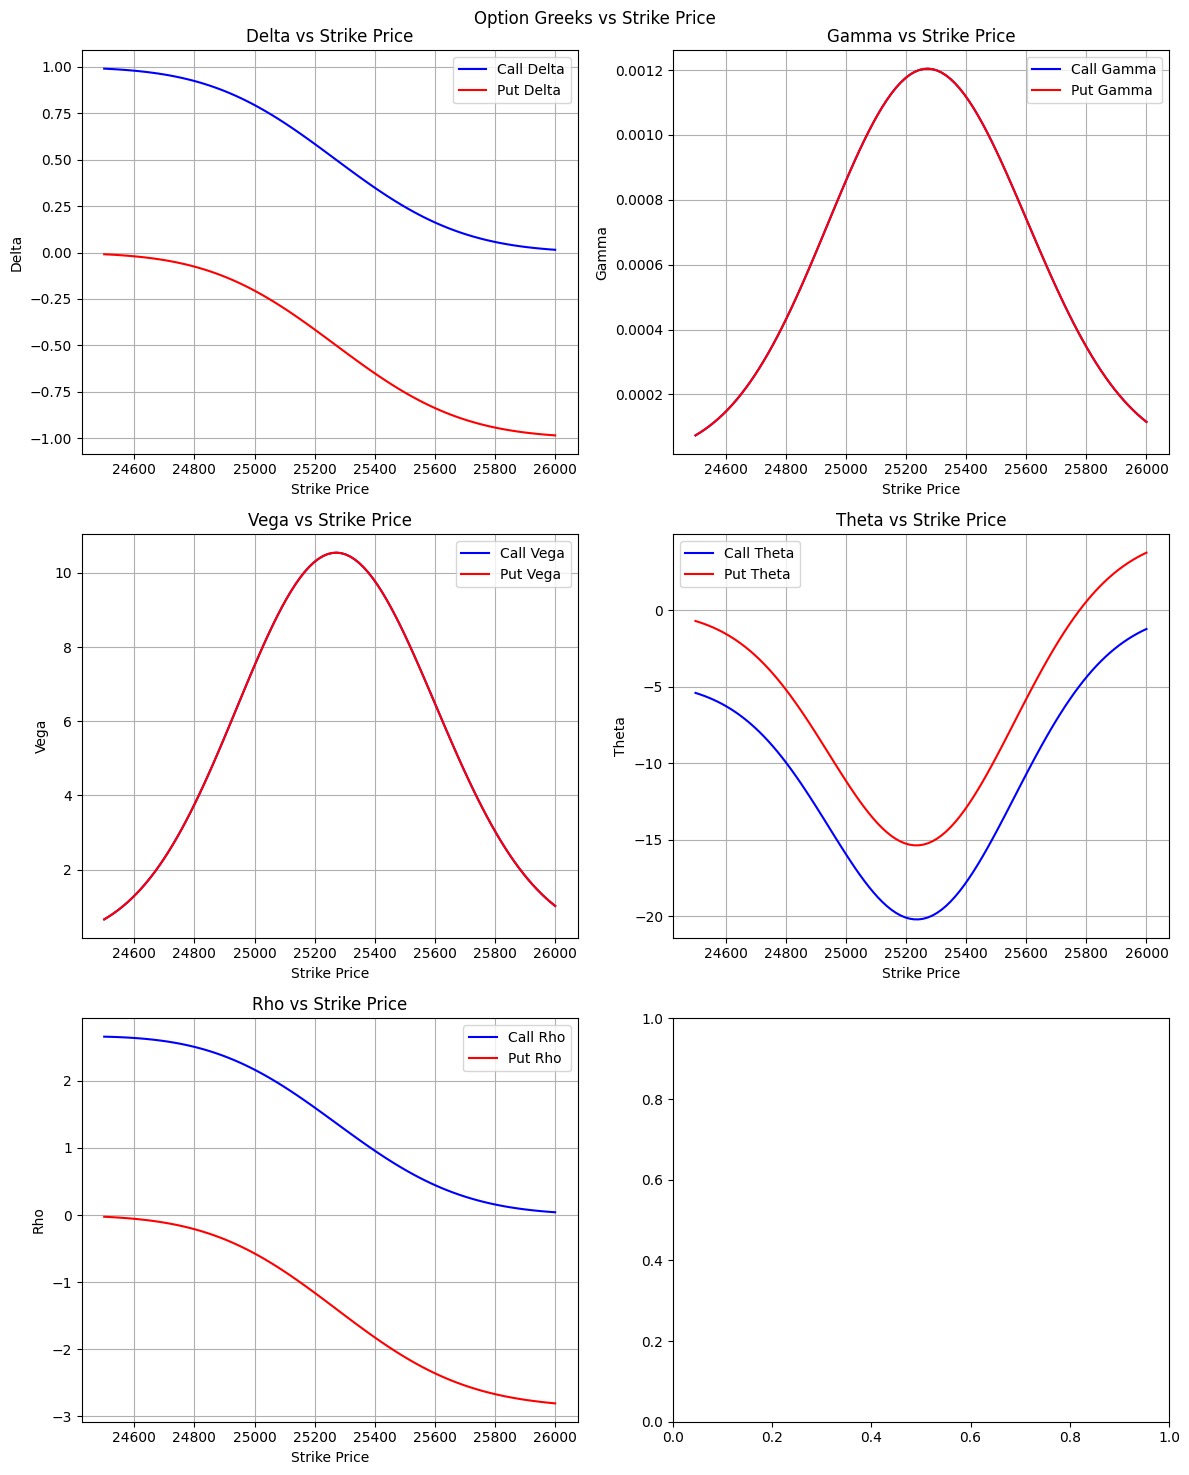

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_greeks_vs_strike(S, K_range, T, R, IV):
    delta_call, gamma_call, vega_call, theta_call, rho_call = [], [], [], [], []
    delta_put, gamma_put, vega_put, theta_put, rho_put = [], [], [], [], []

    for K in K_range:
        # Call Option Greeks
        greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
        delta_call.append(greeks_call['delta'][0])
        gamma_call.append(greeks_call['gamma'][0])
        vega_call.append(greeks_call['vega'][0])
        theta_call.append(greeks_call['theta'][0])
        rho_call.append(greeks_call['rho'][0])

        # Put Option Greeks
        greeks_put = get_all_greeks('p', S, K, T, R, IV, model='black_scholes', return_as='dict')
        delta_put.append(greeks_put['delta'][0])
        gamma_put.append(greeks_put['gamma'][0])
        vega_put.append(greeks_put['vega'][0])
        theta_put.append(greeks_put['theta'][0])
        rho_put.append(greeks_put['rho'][0])

    fig, axs = plt.subplots(3, 2, figsize=(12, 15))
    axs = axs.flatten()

    greek_names = ['Delta', 'Gamma', 'Vega', 'Theta', 'Rho']
    call_greeks = [delta_call, gamma_call, vega_call, theta_call, rho_call]
    put_greeks = [delta_put, gamma_put, vega_put, theta_put, rho_put]

    for i, greek in enumerate(greek_names):
        axs[i].plot(K_range, call_greeks[i], label=f'Call {greek}', color='blue')
        axs[i].plot(K_range, put_greeks[i], label=f'Put {greek}', color='red')
        axs[i].set_title(f'{greek} vs Strike Price')
        axs[i].set_xlabel('Strike Price')
        axs[i].set_ylabel(greek)
        axs[i].legend()
        axs[i].grid()

    plt.suptitle('Option Greeks vs Strike Price')
    plt.tight_layout()
    plt.show()

# Define parameters
S = 25250  # Stock price
K_range = np.linspace(24500, 26000, 100)  # Strike price range from 24,500 to 26,000
T = 4/365  # Time to expiry
R = 7/100  # Risk-free rate
IV = 12.53/100  # Implied volatility

# Plot Greeks vs Strike Price
plot_greeks_vs_strike(S, K_range, T, R, IV)

## Impact of Risk-Free Rate (R) on Option Greeks  

### **Concept:**  
The **risk-free rate (R)** affects **options pricing and Greeks** in the following ways:  

- **Delta**:  
  - **Increases for calls**.  
  - **Decreases for puts**.  
- **Rho**:  
  - **Highly sensitive** to R, as it measures **sensitivity to interest rate changes**.  
- **Theta**:  
  - Can be **slightly affected** due to **discounting**.  
- **Gamma & Vega**:  
  - Generally remain **stable** with **small variations**.  


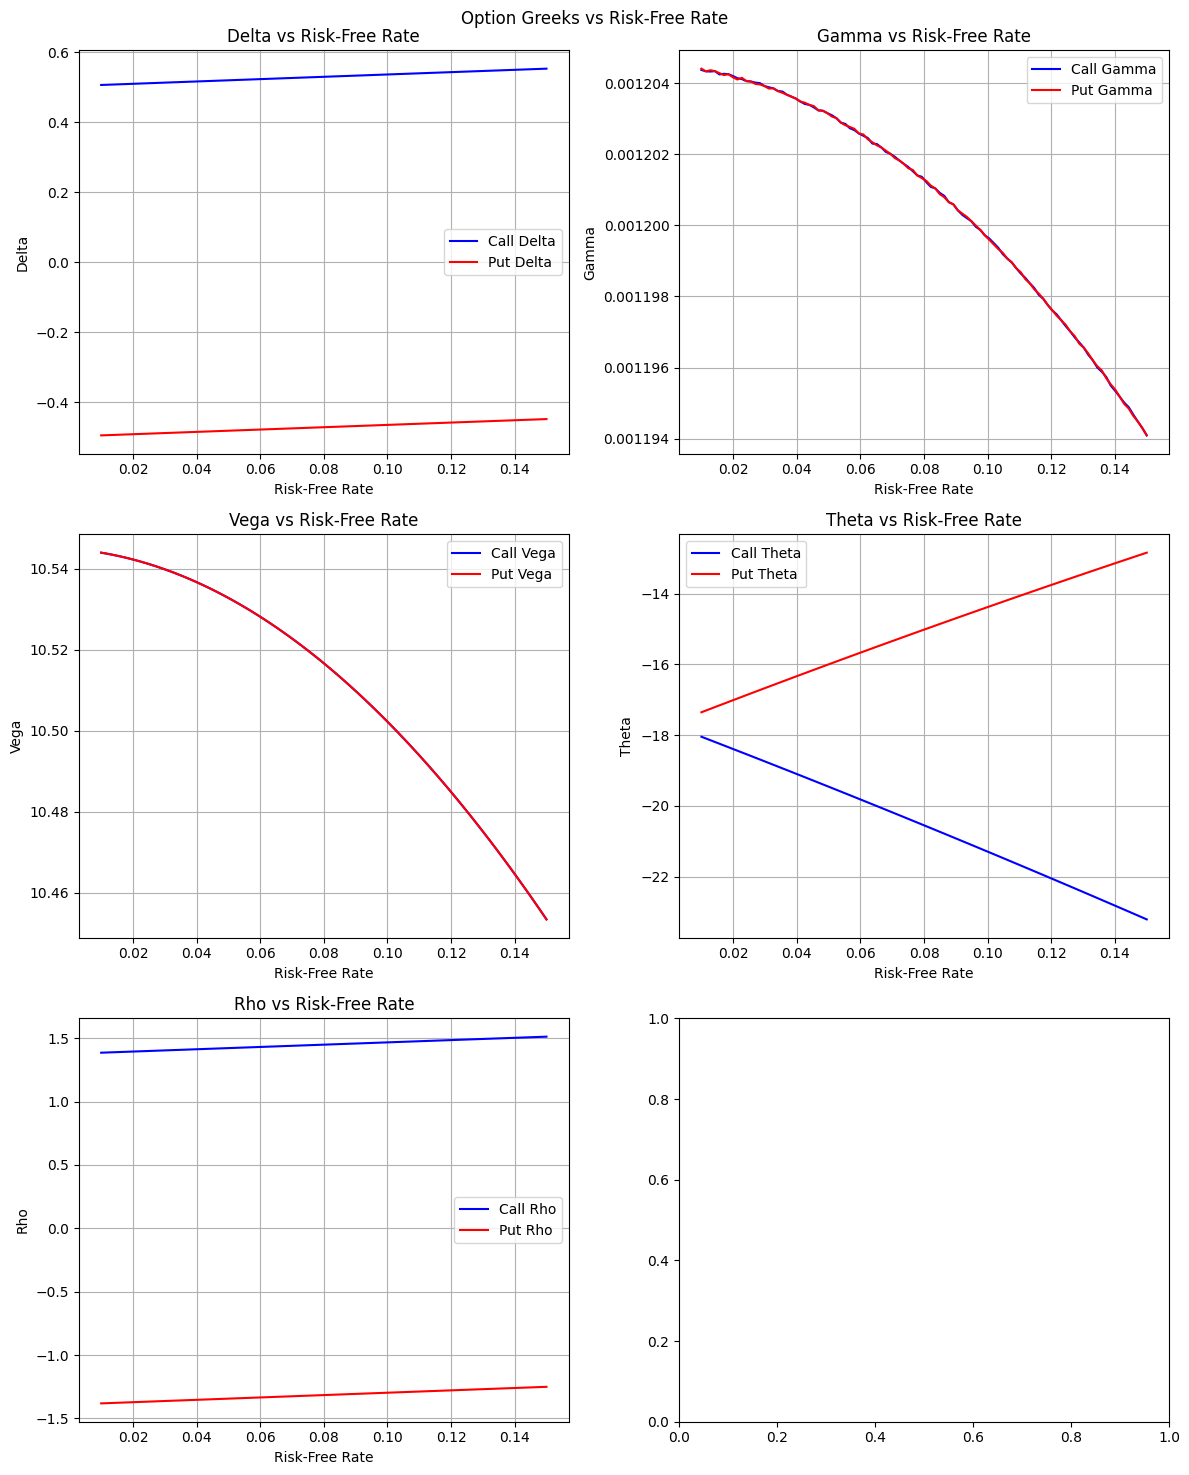

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_greeks_vs_risk_free_rate(S, K, T, R_range, IV):
    delta_call, gamma_call, vega_call, theta_call, rho_call = [], [], [], [], []
    delta_put, gamma_put, vega_put, theta_put, rho_put = [], [], [], [], []

    for R in R_range:
        # Call Option Greeks
        greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
        delta_call.append(greeks_call['delta'][0])
        gamma_call.append(greeks_call['gamma'][0])
        vega_call.append(greeks_call['vega'][0])
        theta_call.append(greeks_call['theta'][0])
        rho_call.append(greeks_call['rho'][0])

        # Put Option Greeks
        greeks_put = get_all_greeks('p', S, K, T, R, IV, model='black_scholes', return_as='dict')
        delta_put.append(greeks_put['delta'][0])
        gamma_put.append(greeks_put['gamma'][0])
        vega_put.append(greeks_put['vega'][0])
        theta_put.append(greeks_put['theta'][0])
        rho_put.append(greeks_put['rho'][0])

    fig, axs = plt.subplots(3, 2, figsize=(12, 15))
    axs = axs.flatten()

    greek_names = ['Delta', 'Gamma', 'Vega', 'Theta', 'Rho']
    call_greeks = [delta_call, gamma_call, vega_call, theta_call, rho_call]
    put_greeks = [delta_put, gamma_put, vega_put, theta_put, rho_put]

    for i, greek in enumerate(greek_names):
        axs[i].plot(R_range, call_greeks[i], label=f'Call {greek}', color='blue')
        axs[i].plot(R_range, put_greeks[i], label=f'Put {greek}', color='red')
        axs[i].set_title(f'{greek} vs Risk-Free Rate')
        axs[i].set_xlabel('Risk-Free Rate')
        axs[i].set_ylabel(greek)
        axs[i].legend()
        axs[i].grid()

    plt.suptitle('Option Greeks vs Risk-Free Rate')
    plt.tight_layout()
    plt.show()

# Define parameters
S = 25250  # Stock price
K = 25250  # Strike price
T = 4/365  # Time to expiry
R_range = np.linspace(0.01, 0.15, 100)  # Risk-free rate range from 1% to 15%
IV = 12.53/100  # Implied volatility

# Plot Greeks vs Risk-Free Rate
plot_greeks_vs_risk_free_rate(S, K, T, R_range, IV)


## Combined Effect of Time to Expiry (T) and Implied Volatility (IV) on Option Greeks  

### **Concept:**  
**Time to Expiry (T) and Implied Volatility (IV)** interact strongly in affecting **option prices and Greeks**:  

- **Theta decay accelerates** as **expiry nears**, more for **ATM options**.  
- **Vega is highest** for **longer expiries** and **ATM options**.  
- **Gamma spikes near expiry** for **ATM options**.  
- **Delta changes faster** for **shorter expiries**.  


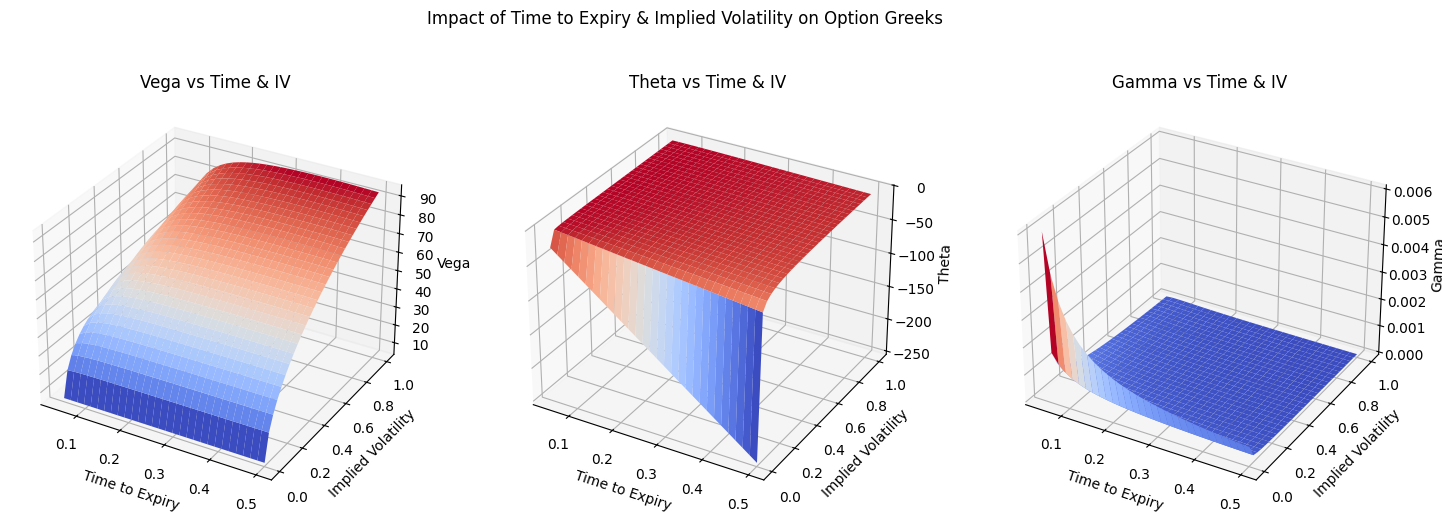

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_greeks_vs_time_and_iv(S, K, T_range, IV_range, R):
    vega_values, theta_values, gamma_values = [], [], []

    for T in T_range:
        vega_temp, theta_temp, gamma_temp = [], [], []
        for IV in IV_range:
            greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
            vega_temp.append(greeks_call['vega'][0])
            theta_temp.append(greeks_call['theta'][0])
            gamma_temp.append(greeks_call['gamma'][0])

        vega_values.append(vega_temp)
        theta_values.append(theta_temp)
        gamma_values.append(gamma_temp)

    T_mesh, IV_mesh = np.meshgrid(IV_range, T_range)

    fig = plt.figure(figsize=(18, 6))

    # Vega Plot
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(T_mesh, IV_mesh, np.array(vega_values), cmap='coolwarm')
    ax1.set_title('Vega vs Time & IV')
    ax1.set_xlabel('Time to Expiry')
    ax1.set_ylabel('Implied Volatility')
    ax1.set_zlabel('Vega')

    # Theta Plot
    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(T_mesh, IV_mesh, np.array(theta_values), cmap='coolwarm')
    ax2.set_title('Theta vs Time & IV')
    ax2.set_xlabel('Time to Expiry')
    ax2.set_ylabel('Implied Volatility')
    ax2.set_zlabel('Theta')

    # Gamma Plot
    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot_surface(T_mesh, IV_mesh, np.array(gamma_values), cmap='coolwarm')
    ax3.set_title('Gamma vs Time & IV')
    ax3.set_xlabel('Time to Expiry')
    ax3.set_ylabel('Implied Volatility')
    ax3.set_zlabel('Gamma')

    plt.suptitle('Impact of Time to Expiry & Implied Volatility on Option Greeks')
    plt.show()

# Define parameters
S = 25250  # Stock price
K = 25250  # Strike price
T_range = np.linspace(1/365, 1, 30)  # Time to expiry from 1 day to 1 year
IV_range = np.linspace(5/100, 50/100, 30)  # Implied volatility from 5% to 50%
R = 7/100  # Risk-free rate

# Plot Greeks vs Time and IV
plot_greeks_vs_time_and_iv(S, K, T_range, IV_range, R)

## Skewness and Smile in Implied Volatility (IV) and Their Effect on Greeks  

### **Concept:**  

### **Implied Volatility Smile:**  
- **IV tends to be higher** for **deep ITM and OTM options** than **ATM options**, forming a **"smile" shape**.  
- This affects **Vega, Gamma, and Theta**, especially **near ATM**.  

### **Implied Volatility Skew:**  
- **IV is often higher for puts than calls**, leading to a **skew**.  
- **Rho and Delta are influenced**, since **put options become more expensive**.  


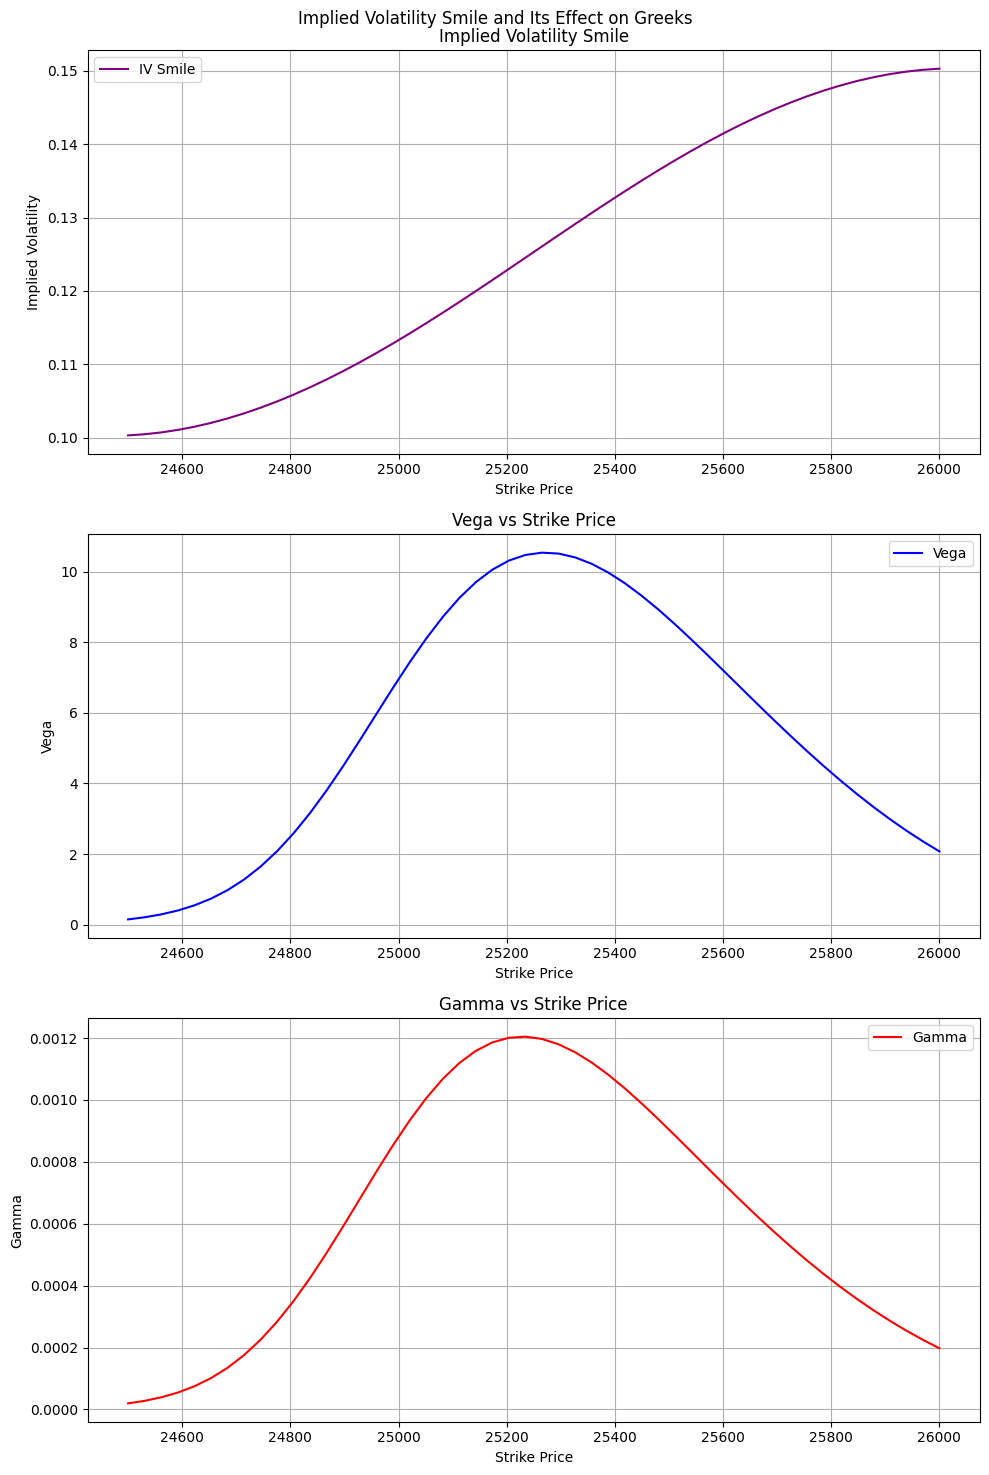

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_iv_smile_and_greeks(S, K_range, T, R, base_IV):
    iv_smile = base_IV * (1 + 0.2 * np.sin((K_range - S) / 500))  # Creating an IV smile shape
    vega_values, gamma_values = [], []

    for i, K in enumerate(K_range):
        IV = iv_smile[i]
        greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
        vega_values.append(greeks_call['vega'][0])
        gamma_values.append(greeks_call['gamma'][0])

    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # IV Smile Plot
    axs[0].plot(K_range, iv_smile, label='IV Smile', color='purple')
    axs[0].set_title('Implied Volatility Smile')
    axs[0].set_xlabel('Strike Price')
    axs[0].set_ylabel('Implied Volatility')
    axs[0].legend()
    axs[0].grid()

    # Vega vs Strike Price
    axs[1].plot(K_range, vega_values, label='Vega', color='blue')
    axs[1].set_title('Vega vs Strike Price')
    axs[1].set_xlabel('Strike Price')
    axs[1].set_ylabel('Vega')
    axs[1].legend()
    axs[1].grid()

    # Gamma vs Strike Price
    axs[2].plot(K_range, gamma_values, label='Gamma', color='red')
    axs[2].set_title('Gamma vs Strike Price')
    axs[2].set_xlabel('Strike Price')
    axs[2].set_ylabel('Gamma')
    axs[2].legend()
    axs[2].grid()

    plt.suptitle('Implied Volatility Smile and Its Effect on Greeks')
    plt.tight_layout()
    plt.show()

# Define parameters
S = 25250  # Stock price
K_range = np.linspace(24500, 26000, 50)  # Strike price range
T = 4/365  # Time to expiry
R = 7/100  # Risk-free rate
base_IV = 12.53/100  # Base Implied Volatility

# Plot IV Smile and its effect on Greeks
plot_iv_smile_and_greeks(S, K_range, T, R, base_IV)

## Effect of Gamma on Hedging and Portfolio Stability  


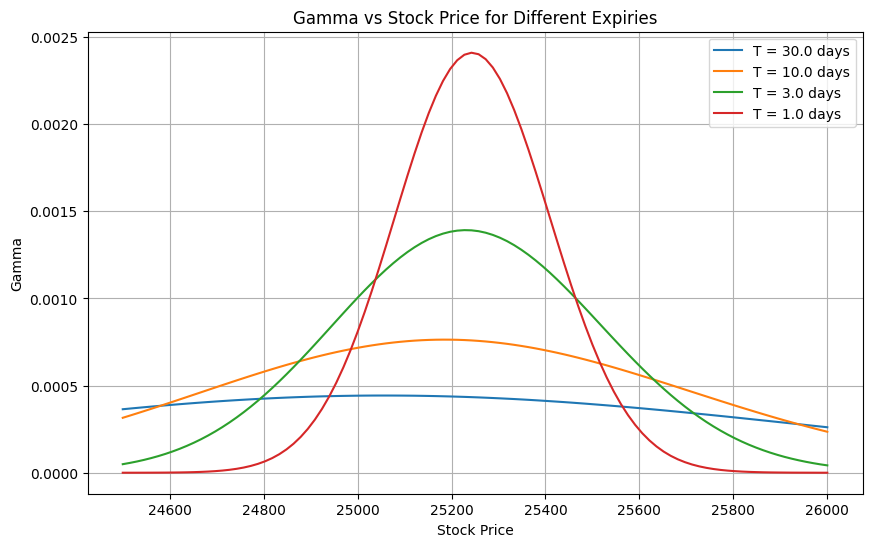

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_gamma_vs_stock_price(S_range, K, T_values, R, IV):
    fig, ax = plt.subplots(figsize=(10, 6))

    for T in T_values:
        gamma_values = []
        for S in S_range:
            greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
            gamma_values.append(greeks_call['gamma'][0])
        ax.plot(S_range, gamma_values, label=f'T = {round(T*365, 1)} days')

    ax.set_title('Gamma vs Stock Price for Different Expiries')
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Gamma')
    ax.legend()
    ax.grid()
    plt.show()

# Define parameters
S_range = np.linspace(24500, 26000, 100)  # Stock price range
K = 25250  # Strike price
T_values = [30/365, 10/365, 3/365, 1/365]  # Time to expiry (30 days, 10 days, 3 days, 1 day)
R = 7/100  # Risk-free rate
IV = 12.53/100  # Implied volatility

# Plot Gamma vs Stock Price
plot_gamma_vs_stock_price(S_range, K, T_values, R, IV)


## The Relationship Between Theta Decay and Gamma Spikes  

### **Concept:**  
- As **expiry nears**, **Theta decay accelerates**, meaning **options lose value faster**.  
- **Gamma also spikes** near expiry, especially for **ATM options**, leading to **higher risk**.  

### **Trading Implications:**  
A trader must balance between **Gamma exposure** and **Theta decay**:  
- **High Gamma** → Requires **frequent hedging** but provides **more directional sensitivity**.  
- **High Theta decay** → Makes **options lose value quickly**, especially **short-term options**.  


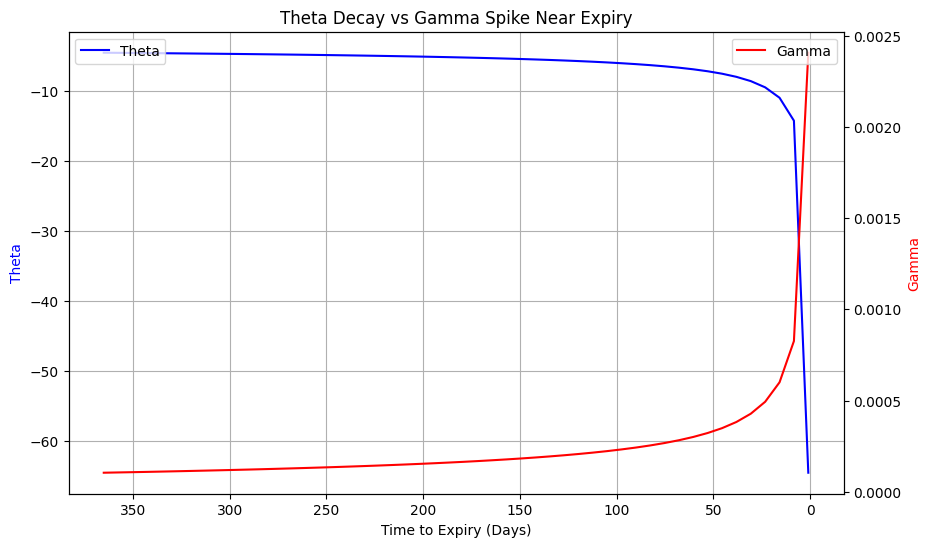

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from py_vollib_vectorized import get_all_greeks

def plot_theta_vs_gamma(T_range, S, K, R, IV):
    theta_values, gamma_values = [], []

    for T in T_range:
        greeks_call = get_all_greeks('c', S, K, T, R, IV, model='black_scholes', return_as='dict')
        theta_values.append(greeks_call['theta'][0])
        gamma_values.append(greeks_call['gamma'][0])

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    ax1.plot(T_range * 365, theta_values, label='Theta', color='blue')
    ax2.plot(T_range * 365, gamma_values, label='Gamma', color='red')

    ax1.set_xlabel('Time to Expiry (Days)')
    ax1.set_ylabel('Theta', color='blue')
    ax2.set_ylabel('Gamma', color='red')

    ax1.set_title('Theta Decay vs Gamma Spike Near Expiry')
    ax1.invert_xaxis()  # So that time runs from 1 year to 0 days

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.grid()

    plt.show()

# Define parameters
S = 25250  # Stock price
K = 25250  # Strike price (ATM)
T_range = np.linspace(1/365, 1, 50)  # Time to expiry from 1 day to 1 year
R = 7/100  # Risk-free rate
IV = 12.53/100  # Implied volatility

# Plot Theta vs Gamma
plot_theta_vs_gamma(T_range, S, K, R, IV)